# Let's try our model out!

In [1]:
%matplotlib inline

import numpy as np
from sklearn import datasets, model_selection, metrics
import matplotlib.pyplot as plt

from one_vs_all import MultipleClassRegression

def calc_acc(model, X, y):
	return (model.predict(X) == y).astype(int).mean()

First of all, load digits dataset. Notice that each diget is represented as an array of 64 elements (former 8 by 8 image).

In [2]:
digits = datasets.load_digits()
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.6)

Now, let's train our model and take a closer look at the process of training.

In [3]:
one_vs_all_regr = MultipleClassRegression(lr=0.01)
one_vs_all_regr.bind(X_train, y_train)

train_acc = []
test_acc = []

for i in range(100):
	one_vs_all_regr.train(num_iter=100)
	train_acc.append( calc_acc(one_vs_all_regr, X_train, y_train) )
	test_acc.append( calc_acc(one_vs_all_regr, X_test, y_test) )

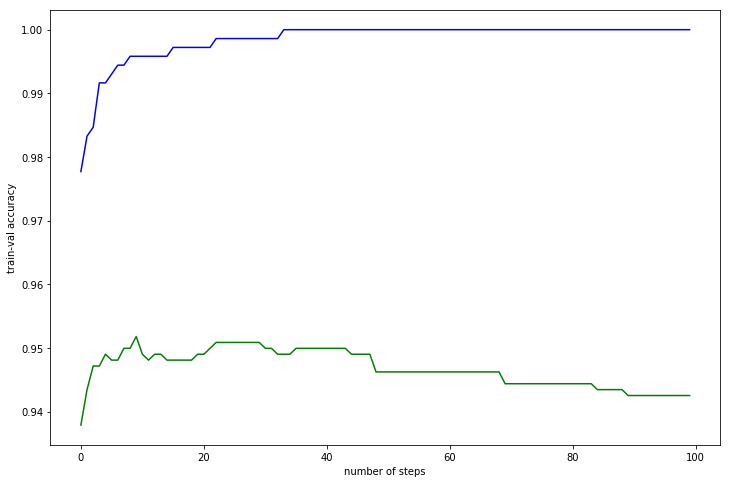

In [4]:
fig = plt.figure(figsize=(12,8))

plt.ylabel('train-val accuracy')
plt.xlabel('number of steps')

plt.plot(train_acc, 'b')
plt.plot(test_acc, 'g')

plt.show()

As you can see, the model is slightly overfitted. Now we plot a confusion matrix.

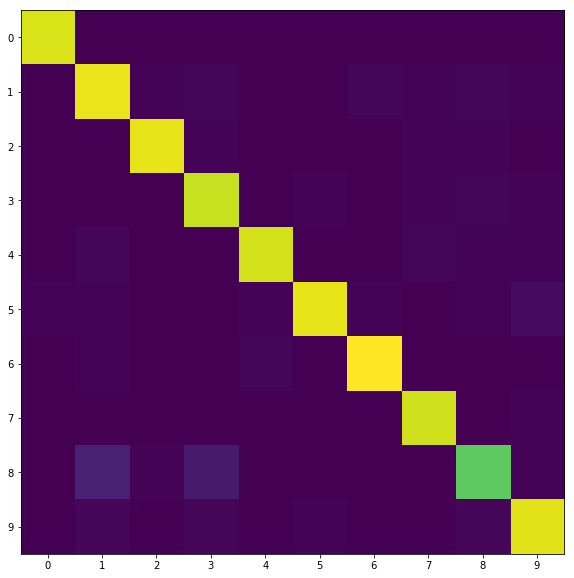

In [5]:
fig = plt.figure(figsize=(10,10))

plt.imshow( metrics.confusion_matrix(y_test, one_vs_all_regr.predict(X_test)) )
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.show()

Finally, let's visualize the classifiers weights. They should resemble the digits themselves.

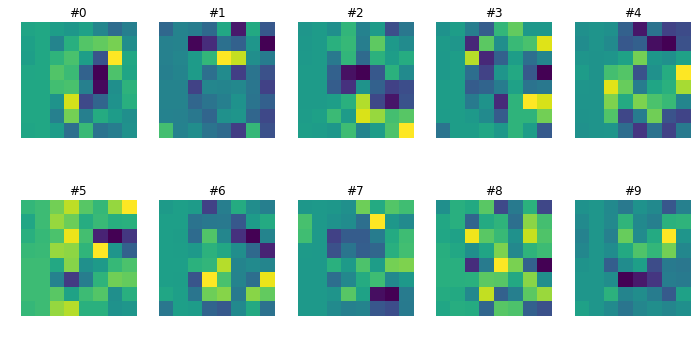

In [6]:
fig = plt.figure(figsize=(12,6))

for d in range(10):
	weights_matrix = one_vs_all_regr.classifiers[d].theta[:-1].reshape(8, 8)
	plt.subplot(2, 5, d + 1)
	plt.axis('off')
	plt.imshow(weights_matrix)
	plt.title('#{}'.format(d))

plt.show()